# IBM Capstone Project: The Battle of Neighborhoods

## Alfredo Montero Fernández

### Part 1: Introduction Business Problem

Tokyo is one of my favourites cities across all the world. It has so many things to offer: nice people, beautiful sights, a lot of entertainments and really really good food. Being as big as it is you can find a lot of different zones in the city that it will make you think you are travelling between cities.

The number of overseas visitors is getting incremented year by year, getting a peak of nearly 32 million in 2019! Sadly 2020 has been a really hard time for tourism and hostelry, but we expect that in the near future everything will return to the good days for visting this amazing countries.

With the vast amount of restaurants distributed across the 23 wards of the city, it can be really hard to decide which one to choose. It even has 226 restaurants with a star on the Michelin guide!
So with the help of Foursquare and Machine Learning algorithms, we will be able to get a good recommendation for you depending on what you want, recommending the best district for you! This way if you are a visitor to the rising sun country, continue reading, this is for you!

### Part 2: Data Preparation

- First we need the data of the different Tokyo's wards. We can obtain it from: https://en.wikipedia.org/wiki/Special_wards_of_Tokyo#List_of_special_wards
- Secondly we will manage it and convert it to a data frame with the geographic location of every ward.
- Lastly, with the help of Foursquare we will retrieve data for the restaurants on every ward and we will use it to compare each one of them and divide them into different klusters using K-means methods, so deppending on your tastes you will be able to know which wards are going to reward you with your favourite food. We will also obtain data from leaflet with the library folium so we can display a nice visualization map.


On the second week of this project we will show our code step by step and the data obtained for each one.

### Part 3: Exploratory Data Analysis

We start by importing pandas and numpy.

In [1]:
import pandas as pd
import numpy as np

Now we are going to read the data of the Tokio's wards from the Wikipedia page.

In [35]:
url = "https://en.wikipedia.org/wiki/Special_wards_of_Tokyo#List_of_special_wards"
df = pd.read_html(url)[3]
df.head()

,No.,Flag,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,01,NaN,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,NaN,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,NaN,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"


Next we are going to clena the table by removing the columns we don't need and renaming the others.

In [36]:
df.drop("Flag", axis=1, inplace=True)
df.drop("No.", axis=1, inplace=True)
df.drop("Major districts", axis=1, inplace=True)
df.head()

,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2)
0,Chiyoda,千代田区,59441,5100,11.66
1,Chūō,中央区,147620,14460,10.21
2,Minato,港区,248071,12180,20.37
3,Shinjuku,新宿区,339211,18620,18.22
4,Bunkyō,文京区,223389,19790,11.29


In [37]:
df = df.rename(columns={"Population(as of October\xa02016":"Population" , "Density(/km2)": "Density" , "Area(km2)": "Area"})


In [38]:
df.head()

,Name,Kanji,Population,Density,Area
0,Chiyoda,千代田区,59441,5100,11.66
1,Chūō,中央区,147620,14460,10.21
2,Minato,港区,248071,12180,20.37
3,Shinjuku,新宿区,339211,18620,18.22
4,Bunkyō,文京区,223389,19790,11.29


We could also remove the kanji column, but as I really like kanji's I will keep them. Also it will help us to get the coordinates of the wards. As a note, you can see that the kanji 区 is repeated over and over. This is because its meaning is *ward* and is read as *ku* (く), so for example Nakano (中野区) is read as Nakano-ku (なかのく) and its meaning is something like *The ward of the center of the plains*.

In [39]:
df.tail()

,Name,Kanji,Population,Density,Area
19,Nerima,練馬区,726748,15120,48.08
20,Adachi,足立区,674067,12660,53.25
21,Katsushika,葛飾区,447140,12850,34.80
22,Edogawa,江戸川区,685899,13750,49.90
23,Overall,Overall,9375104,15146,619.00


As there is also an Overall row, we will remove it also.

In [40]:
df.drop(df.tail(1).index,inplace=True)
df.tail()

,Name,Kanji,Population,Density,Area
18,Itabashi,板橋区,569225,17670,32.22
19,Nerima,練馬区,726748,15120,48.08
20,Adachi,足立区,674067,12660,53.25
21,Katsushika,葛飾区,447140,12850,34.80
22,Edogawa,江戸川区,685899,13750,49.90


The next step is to get the latitude and longitude coordinates of the data.

In [42]:
!conda install -c conda-forge geopy --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\anaconda

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0
  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will be SUP

In [43]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Tokyo_explorer")

df['Coords']= df['Kanji'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Coords'].apply(pd.Series)

df.drop(['Coords'], axis=1, inplace=True)
df

,Name,Kanji,Population,Density,Area,Latitude,Longitude
0,Chiyoda,千代田区,59441,5100,11.66,35.693810,139.753216
1,Chūō,中央区,147620,14460,10.21,35.666255,139.775565
2,Minato,港区,248071,12180,20.37,35.643227,139.740055
3,Shinjuku,新宿区,339211,18620,18.22,35.693763,139.703632
4,Bunkyō,文京区,223389,19790,11.29,35.718810,139.744732
5,Taitō,台東区,200486,19830,10.11,35.717450,139.790859
6,Sumida,墨田区,260358,18910,13.77,35.700429,139.805017
7,Kōtō,江東区,502579,12510,40.16,35.649154,139.812790
8,Shinagawa,品川区,392492,17180,22.84,35.599252,139.738910
9,Meguro,目黒区,280283,19110,14.67,35.621250,139.688014


Now we will explore the districs and cluster them. First we install the required libraries.

In [45]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: D:\anaconda

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1h             |       he774522_0         5.8 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.4 MB

The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::alta

In [46]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests # library to handle requests

import json
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
import seaborn as sns
# import k-means from clustering stage
from sklearn.cluster import KMeans
 
import folium # map rendering library


Lets start getting the coordinates of Tokyo.

In [47]:
address = 'Tokyo'

geolocator = Nominatim(user_agent="Tokyo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tokyo are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tokyo are 35.6828387, 139.7594549.


Lets visualize the map of the wards now.

In [48]:
# create map of Tokyo using latitude and longitude values
map_tokyo = folium.Map(location=[latitude, longitude], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tokyo) 
    
map_tokyo

Next we will use the Foursquare API, we will hide the credentials for requesting the call once run, as they are private.

In [49]:
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20180604'

We will start looking at what kind of restaurants are on Minato (港区), which contains the distric of Roppongi (六本木).

In [51]:
neighborhood_latitude = df.loc[2, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[2, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[2, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Minato are 35.6432274, 139.7400553.


In [62]:
LIMIT = 100
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [63]:
results = requests.get(url).json()

We define a function that extracts the category of the venue

In [55]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [64]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Matsushimaya (松島屋),Wagashi Place,35.640579,139.737529
1,Maison Kayser (メゾンカイザー),Bakery,35.643569,139.735952
2,コート・ドール,French Restaurant,35.647345,139.737840
3,David's Deli,Kosher Restaurant,35.644743,139.737651
4,Imafuku (今福),Sukiyaki Restaurant,35.645379,139.734142


In [65]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
print ('{} unique categories in Minato'.format(nearby_venues['categories'].value_counts().shape[0]))

100 venues were returned by Foursquare.
48 unique categories in Minato


Lets see what are the most common kinds.

In [66]:
print (nearby_venues['categories'].value_counts()[0:10])

Japanese Restaurant    13
Chinese Restaurant      9
Italian Restaurant      6
Coffee Shop             5
Soba Restaurant         5
Indian Restaurant       4
Sake Bar                3
BBQ Joint               3
Ramen Restaurant        3
Yakitori Restaurant     2
Name: categories, dtype: int64


Lets define a function to obtain this information for every ward.

In [67]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [68]:
Tokyo_venues = getNearbyVenues(names=df['Name'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Chiyoda
Chūō
Minato
Shinjuku
Bunkyō
Taitō
Sumida
Kōtō
Shinagawa
Meguro
Ōta
Setagaya
Shibuya
Nakano
Suginami
Toshima
Kita
Arakawa
Itabashi
Nerima
Adachi
Katsushika
Edogawa


Next step is creating a data frame with this information but just about the restaurants.

In [69]:
Tokyo_Venues_restaurant = Tokyo_venues[Tokyo_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Tokyo_Venues_restaurant.index = np.arange(1, len(Tokyo_Venues_restaurant )+1)

In [71]:
print (Tokyo_Venues_restaurant['Venue Category'].value_counts())

Ramen Restaurant                 119
Japanese Restaurant               72
Chinese Restaurant                69
Sushi Restaurant                  47
Italian Restaurant                47
Soba Restaurant                   47
Donburi Restaurant                26
Yoshoku Restaurant                23
Japanese Curry Restaurant         20
Seafood Restaurant                15
Fast Food Restaurant              15
Tonkatsu Restaurant               15
Indian Restaurant                 14
Teishoku Restaurant               13
Dumpling Restaurant               12
Udon Restaurant                   12
French Restaurant                 11
Yakitori Restaurant               11
Thai Restaurant                   11
Japanese Family Restaurant         9
Monjayaki Restaurant               9
Restaurant                         9
Tempura Restaurant                 8
Kushikatsu Restaurant              6
Sukiyaki Restaurant                6
Okonomiyaki Restaurant             6
Unagi Restaurant                   6
V

There are a lot of ramen restaurants as we can see. Anyone who has been in Tokyo nows it. They are cheap and delicious, so if you go there be sure to try it!

We now create a data frame with the top 10 categories.

In [76]:
Tokyo_Venues_Top10 = Tokyo_Venues_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Tokyo_Venues_Top10=Tokyo_Venues_Top10.reset_index()

Tokyo_Venues_Top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
Tokyo_Venues_Top10

,Venue Category,Frequency
0,Ramen Restaurant,119
1,Japanese Restaurant,72
2,Chinese Restaurant,69
3,Sushi Restaurant,47
4,Italian Restaurant,47
5,Soba Restaurant,47
6,Donburi Restaurant,26
7,Yoshoku Restaurant,23
8,Japanese Curry Restaurant,20
9,Seafood Restaurant,15


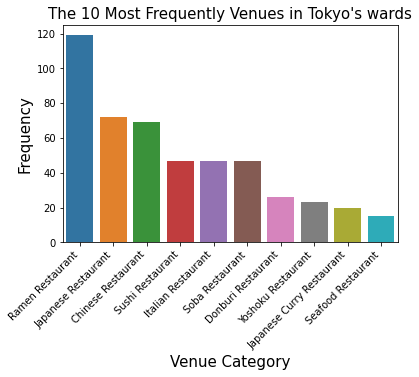

<Figure size 1296x504 with 0 Axes>

In [81]:
s=sns.barplot(x="Venue Category", y="Frequency", data=Tokyo_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('The 10 Most Frequently Venues in Tokyo\'s wards', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("plot1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

Lets see how many restaurants there are on each ward.

In [88]:
Tokyo_restaurant = Tokyo_Venues_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Tokyo_restaurant.sort_values(ascending = False , inplace = True)

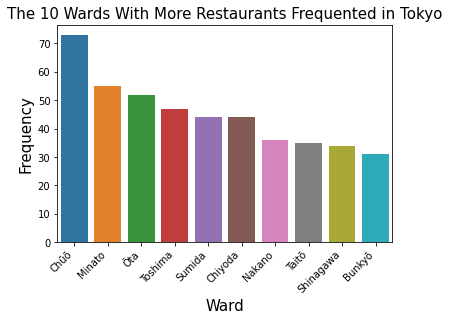

<Figure size 1296x504 with 0 Axes>

In [113]:
s=sns.barplot(x=Tokyo_top_wards.index, y = "Venue Category" , data=Tokyo_restaurant.to_frame()[0:10])
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('The 10 Wards With More Restaurants Frequented in Tokyo', fontsize=15)
plt.xlabel("Ward", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("plot2.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

As we can see Chūō (中央区) is the ward with more frequented restaurants in Japan. This is normal since Ginza (銀座) and Nihonbashi (日本橋), two of the most popular upscale shopping areas of Tokyo, are districts of this warp. 

Lets continue with the one-hot enconding of the data

In [123]:
Tokyo_restaurant_df  = Tokyo_restaurant.to_frame().reset_index()
Tokyo_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Tokyo_restaurant_df.index = np.arange(1, len(Tokyo_restaurant_df)+1)
list_rest_no =Tokyo_restaurant_df['Number of Restaurant'].to_list()
list_dist =Tokyo_restaurant_df['Neighborhood'].to_list()
Tokyo_onehot = pd.get_dummies(Tokyo_Venues_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Tokyo_onehot['Neighborhood'] = Tokyo_Venues_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Tokyo_onehot.columns[-1]] + list(Tokyo_onehot.columns[:-1])
Tokyo_onehot = Tokyo_onehot[fixed_columns]

Tokyo_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,Bangladeshi Restaurant,Belgian Restaurant,Brazilian Restaurant,Cantonese Restaurant,Chinese Restaurant,Dim Sum Restaurant,Donburi Restaurant,Dongbei Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Family Restaurant,Japanese Restaurant,Kaiseki Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Mediterranean Restaurant,Mexican Restaurant,Monjayaki Restaurant,Nabe Restaurant,Okonomiyaki Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South Indian Restaurant,Spanish Restaurant,Sukiyaki Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Teishoku Restaurant,Tempura Restaurant,Thai Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
1,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [124]:
Tokyo_onehot.shape

(730, 58)

Now we group rows by neighborhood and take the mean of the frequency of occurrence of each category.

In [125]:
Tokyo_grouped = Tokyo_onehot.groupby('Neighborhood').mean().reset_index()
Tokyo_grouped

,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,Bangladeshi Restaurant,Belgian Restaurant,Brazilian Restaurant,Cantonese Restaurant,Chinese Restaurant,Dim Sum Restaurant,Donburi Restaurant,Dongbei Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Family Restaurant,Japanese Restaurant,Kaiseki Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Mediterranean Restaurant,Mexican Restaurant,Monjayaki Restaurant,Nabe Restaurant,Okonomiyaki Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South Indian Restaurant,Spanish Restaurant,Sukiyaki Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Teishoku Restaurant,Tempura Restaurant,Thai Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
0,Adachi,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.130435,0.000000,0.086957,0.000000,0.000000,0.130435,0.000000,0.000000,0.000000,0.000000,0.000000,0.086957,0.043478,0.000000,0.130435,0.043478,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217391,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478
1,Arakawa,0.000000,0.000000,0.000000,0.04,0.000000,0.000000,0.000000,0.200000,0.000000,0.120000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.040000,0.040000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bunkyō,0.000000,0.032258,0.000000,0.00,0.000000,0.000000,0.000000,0.096774,0.000000,0.096774,0.000000,0.032258,0.032258,0.032258,0.000000,0.000000,0.000000,0.000000,0.032258,0.161290,0.064516,0.032258,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.032258,0.032258,0.000000,0.032258,0.032258,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.032258,0.000000,0.032258
3,Chiyoda,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.113636,0.000000,0.022727,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.204545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.204545,0.000000,0.022727,0.022727,0.000000,0.000000,0.068182,0.000000,0.022727,0.000000,0.045455,0.022727,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.068182
4,Chūō,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.013699,0.000000,0.027397,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000,0.013699,0.068493,0.027397,0.000000,0.136986,0.054795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.123288,0.013699,0.000000,0.027397,0.000000,0.000000,0.041096,0.000000,0.000000,0.082192,0.000000,0.027397,0.000000,0.219178,0.000000,0.000000,0.000000,0.027397,0.000000,0.041096,0.000000,0.000000,0.013699,0.000000,0.000000,0.013699,0.013699
5,Edogawa,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.047619,0.000000,0.095238,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000

And we confirm it has 23 rows.

In [126]:
Tokyo_grouped.shape

(23, 58)

Let's print each neighborhood along with the top 5 most common venues.

In [146]:
num_top_venues = 5

for hood in Tokyo_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Tokyo_grouped[Tokyo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adachi----
                        venue  freq
0            Ramen Restaurant  0.22
1        Fast Food Restaurant  0.13
2  Japanese Family Restaurant  0.13
3          Chinese Restaurant  0.13
4           Indian Restaurant  0.09


----Arakawa----
                venue  freq
0  Chinese Restaurant  0.20
1  Italian Restaurant  0.12
2    Ramen Restaurant  0.12
3  Donburi Restaurant  0.12
4    Sushi Restaurant  0.08


----Bunkyō----
                 venue  freq
0   Italian Restaurant  0.16
1   Chinese Restaurant  0.10
2   Donburi Restaurant  0.10
3     Ramen Restaurant  0.06
4  Japanese Restaurant  0.06


----Chiyoda----
                       venue  freq
0           Ramen Restaurant  0.20
1  Japanese Curry Restaurant  0.20
2         Chinese Restaurant  0.11
3         Tempura Restaurant  0.09
4         Yoshoku Restaurant  0.07


----Chūō----
                  venue  freq
0      Sushi Restaurant  0.22
1   Japanese Restaurant  0.14
2  Monjayaki Restaurant  0.12
3       Soba Restaurant  0.08

Now we put this information in a data frame. For this first we define a function that sorts the venues in descending order.

In [128]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [147]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Tokyo_grouped['Neighborhood']

for ind in np.arange(Tokyo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tokyo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adachi,Ramen Restaurant,Japanese Family Restaurant,Chinese Restaurant,Fast Food Restaurant,Donburi Restaurant,Indian Restaurant,Yoshoku Restaurant,Japanese Restaurant,Restaurant,Italian Restaurant
1,Arakawa,Chinese Restaurant,Italian Restaurant,Donburi Restaurant,Ramen Restaurant,Sushi Restaurant,Fast Food Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Tonkatsu Restaurant,Japanese Family Restaurant
2,Bunkyō,Italian Restaurant,Donburi Restaurant,Chinese Restaurant,Japanese Curry Restaurant,Ramen Restaurant,Japanese Restaurant,Dumpling Restaurant,Soba Restaurant,Japanese Family Restaurant,Vietnamese Restaurant
3,Chiyoda,Japanese Curry Restaurant,Ramen Restaurant,Chinese Restaurant,Tempura Restaurant,Soba Restaurant,Yoshoku Restaurant,Sushi Restaurant,Okonomiyaki Restaurant,Udon Restaurant,Russian Restaurant
4,Chūō,Sushi Restaurant,Japanese Restaurant,Monjayaki Restaurant,Soba Restaurant,Italian Restaurant,Kaiseki Restaurant,Seafood Restaurant,Tonkatsu Restaurant,Japanese Curry Restaurant,Tempura Restaurant
5,Edogawa,Ramen Restaurant,Soba Restaurant,Tonkatsu Restaurant,Donburi Restaurant,Chinese Restaurant,Okonomiyaki Restaurant,Fast Food Restaurant,Restaurant,Sushi Restaurant,Seafood Restaurant
6,Itabashi,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Ramen Restaurant,Restaurant,Italian Restaurant,Fast Food Restaurant,Yoshoku Restaurant,Halal Restaurant,Kebab Restaurant
7,Katsushika,Donburi Restaurant,Ramen Restaurant,Soba Restaurant,Italian Restaurant,Fast Food Restaurant,Dumpling Restaurant,Restaurant,Chinese Restaurant,Udon Restaurant,Japanese Restaurant
8,Kita,Ramen Restaurant,Soba Restaurant,Kushikatsu Restaurant,Japanese Restaurant,Italian Restaurant,Teishoku Restaurant,Donburi Restaurant,Dumpling Restaurant,Kebab Restaurant,Kaiseki Restaurant
9,Kōtō,Teishoku Restaurant,Fast Food Restaurant,Italian Restaurant,Korean Restaurant,Donburi Restaurant,Okonomiyaki Restaurant,Ramen Restaurant,Udon Restaurant,Japanese Restaurant,Soba Restaurant


With the technique of machine learning of K-means we will cluster the data into 5 different clusters.

In [148]:
# set number of clusters
kclusters = 5

Tokyo_grouped_clustering = Tokyo_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([4, 4, 2, 0, 1, 0, 4, 4, 3, 2, 0, 1, 3, 4, 1, 0, 0, 0, 0, 0, 1, 0,
       0])

We will add the cluster label to the last created data frame.

In [149]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tokyo_merged = df

tokyo_merged.rename(columns={'Name':'Neighborhood'}, inplace=True)

tokyo_merged = tokyo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

tokyo_merged.head()

,Neighborhood,Kanji,Population,Density,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chiyoda,千代田区,59441,5100,11.66,35.693810,139.753216,0,Japanese Curry Restaurant,Ramen Restaurant,Chinese Restaurant,Tempura Restaurant,Soba Restaurant,Yoshoku Restaurant,Sushi Restaurant,Okonomiyaki Restaurant,Udon Restaurant,Russian Restaurant
1,Chūō,中央区,147620,14460,10.21,35.666255,139.775565,1,Sushi Restaurant,Japanese Restaurant,Monjayaki Restaurant,Soba Restaurant,Italian Restaurant,Kaiseki Restaurant,Seafood Restaurant,Tonkatsu Restaurant,Japanese Curry Restaurant,Tempura Restaurant
2,Minato,港区,248071,12180,20.37,35.643227,139.740055,1,Japanese Restaurant,Chinese Restaurant,Italian Restaurant,Soba Restaurant,Indian Restaurant,Ramen Restaurant,Sukiyaki Restaurant,Yakitori Restaurant,Mediterranean Restaurant,Kosher Restaurant
3,Shinjuku,新宿区,339211,18620,18.22,35.693763,139.703632,0,Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,Thai Restaurant,Soba Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Hotpot Restaurant,Kushikatsu Restaurant,Yakitori Restaurant
4,Bunkyō,文京区,223389,19790,11.29,35.718810,139.744732,2,Italian Restaurant,Donburi Restaurant,Chinese Restaurant,Japanese Curry Restaurant,Ramen Restaurant,Japanese Restaurant,Dumpling Restaurant,Soba Restaurant,Japanese Family Restaurant,Vietnamese Restaurant


And what we have to do now is to display the map with the different clusters!

In [152]:
# create map
map = folium.Map(location=[latitude,longitude], zoom_start=11)  
                               #attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(tokyo_merged['Latitude'], 
                                  tokyo_merged['Longitude'], 
                                  tokyo_merged['Neighborhood'], 
                                  tokyo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map)
       
map

Lastly let's see what each cluster is compounded of.

## Cluster 1 (red color)

In [153]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 0, tokyo_merged.columns[[0 , 1] + list(range(5, tokyo_merged.shape[1]))]]

,Neighborhood,Kanji,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chiyoda,千代田区,35.693810,139.753216,0,Japanese Curry Restaurant,Ramen Restaurant,Chinese Restaurant,Tempura Restaurant,Soba Restaurant,Yoshoku Restaurant,Sushi Restaurant,Okonomiyaki Restaurant,Udon Restaurant,Russian Restaurant
3,Shinjuku,新宿区,35.693763,139.703632,0,Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,Thai Restaurant,Soba Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Hotpot Restaurant,Kushikatsu Restaurant,Yakitori Restaurant
6,Sumida,墨田区,35.700429,139.805017,0,Ramen Restaurant,Japanese Restaurant,Thai Restaurant,Yoshoku Restaurant,Soba Restaurant,Italian Restaurant,Dumpling Restaurant,Seafood Restaurant,Taiwanese Restaurant,South Indian Restaurant
8,Shinagawa,品川区,35.599252,139.738910,0,Ramen Restaurant,Sushi Restaurant,Donburi Restaurant,Yakitori Restaurant,Soba Restaurant,Chinese Restaurant,Yoshoku Restaurant,Restaurant,Italian Restaurant,Seafood Restaurant
9,Meguro,目黒区,35.621250,139.688014,0,Chinese Restaurant,Japanese Restaurant,Ramen Restaurant,Sushi Restaurant,Thai Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Soba Restaurant,Udon Restaurant,Tonkatsu Restaurant
10,Ōta,大田区,35.561206,139.715843,0,Ramen Restaurant,Chinese Restaurant,Japanese Restaurant,Tonkatsu Restaurant,Dumpling Restaurant,Japanese Curry Restaurant,Sushi Restaurant,Yoshoku Restaurant,Soba Restaurant,Vietnamese Restaurant
12,Shibuya,渋谷区,35.664596,139.698711,0,French Restaurant,Ramen Restaurant,Seafood Restaurant,Chinese Restaurant,Sushi Restaurant,Taiwanese Restaurant,Japanese Restaurant,Yakitori Restaurant,Mexican Restaurant,Restaurant
14,Suginami,杉並区,35.699493,139.636288,0,Ramen Restaurant,Japanese Restaurant,Italian Restaurant,Chinese Restaurant,Thai Restaurant,Indian Restaurant,Sushi Restaurant,Dumpling Restaurant,Seafood Restaurant,Teishoku Restaurant
15,Toshima,豊島区,35.736156,139.714222,0,Ramen Restaurant,Chinese Restaurant,Yoshoku Restaurant,Japanese Restaurant,Sushi Restaurant,Italian Restaurant,Udon Restaurant,Asian Restaurant,Soba Restaurant,Dim Sum Restaurant
22,Edogawa,江戸川区,35.678278,139.871091,0,Ramen Restaurant,Soba Restaurant,Tonkatsu Restaurant,Donburi Restaurant,Chinese Restaurant,Okonomiyaki Restaurant,Fast Food Restaurant,Restaurant,Sushi Restaurant,Seafood Restaurant


## Cluster 2 (purple color)

In [154]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 1, tokyo_merged.columns[[0,1] + list(range(5, tokyo_merged.shape[1]))]]

,Neighborhood,Kanji,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chūō,中央区,35.666255,139.775565,1,Sushi Restaurant,Japanese Restaurant,Monjayaki Restaurant,Soba Restaurant,Italian Restaurant,Kaiseki Restaurant,Seafood Restaurant,Tonkatsu Restaurant,Japanese Curry Restaurant,Tempura Restaurant
2,Minato,港区,35.643227,139.740055,1,Japanese Restaurant,Chinese Restaurant,Italian Restaurant,Soba Restaurant,Indian Restaurant,Ramen Restaurant,Sukiyaki Restaurant,Yakitori Restaurant,Mediterranean Restaurant,Kosher Restaurant
5,Taitō,台東区,35.717450,139.790859,1,Japanese Restaurant,Sukiyaki Restaurant,Soba Restaurant,Nabe Restaurant,Ramen Restaurant,Yoshoku Restaurant,Unagi Restaurant,Chinese Restaurant,Sushi Restaurant,Tonkatsu Restaurant
11,Setagaya,世田谷区,35.646096,139.656270,1,Japanese Restaurant,Italian Restaurant,Ramen Restaurant,Soba Restaurant,Kushikatsu Restaurant,Szechuan Restaurant,Japanese Family Restaurant,Indian Restaurant,Fast Food Restaurant,Dumpling Restaurant


## Cluster 3 (blue color)

In [155]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 2, tokyo_merged.columns[[0,1] + list(range(5, tokyo_merged.shape[1]))]]

,Neighborhood,Kanji,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Bunkyō,文京区,35.718810,139.744732,2,Italian Restaurant,Donburi Restaurant,Chinese Restaurant,Japanese Curry Restaurant,Ramen Restaurant,Japanese Restaurant,Dumpling Restaurant,Soba Restaurant,Japanese Family Restaurant,Vietnamese Restaurant
7,Kōtō,江東区,35.649154,139.812790,2,Teishoku Restaurant,Fast Food Restaurant,Italian Restaurant,Korean Restaurant,Donburi Restaurant,Okonomiyaki Restaurant,Ramen Restaurant,Udon Restaurant,Japanese Restaurant,Soba Restaurant


## Cluster 4 (green color)

In [156]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 3, tokyo_merged.columns[[0,1] + list(range(5, tokyo_merged.shape[1]))]]

,Neighborhood,Kanji,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Nakano,中野区,35.718123,139.664468,3,Ramen Restaurant,Italian Restaurant,Japanese Curry Restaurant,Teishoku Restaurant,Seafood Restaurant,Soba Restaurant,Donburi Restaurant,South Indian Restaurant,Chinese Restaurant,Kushikatsu Restaurant
16,Kita,北区,35.755838,139.736687,3,Ramen Restaurant,Soba Restaurant,Kushikatsu Restaurant,Japanese Restaurant,Italian Restaurant,Teishoku Restaurant,Donburi Restaurant,Dumpling Restaurant,Kebab Restaurant,Kaiseki Restaurant


## Cluster 5 (orange color)

In [157]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 4, tokyo_merged.columns[[0,1] + list(range(5, tokyo_merged.shape[1]))]]

,Neighborhood,Kanji,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Arakawa,荒川区,35.737529,139.781310,4,Chinese Restaurant,Italian Restaurant,Donburi Restaurant,Ramen Restaurant,Sushi Restaurant,Fast Food Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Tonkatsu Restaurant,Japanese Family Restaurant
18,Itabashi,板橋区,35.774143,139.681209,4,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Ramen Restaurant,Restaurant,Italian Restaurant,Fast Food Restaurant,Yoshoku Restaurant,Halal Restaurant,Kebab Restaurant
19,Nerima,練馬区,35.748360,139.638735,4,Sushi Restaurant,Fast Food Restaurant,Japanese Family Restaurant,Italian Restaurant,Soba Restaurant,Chinese Restaurant,Ramen Restaurant,Shabu-Shabu Restaurant,Udon Restaurant,Himalayan Restaurant
20,Adachi,足立区,35.783703,139.795319,4,Ramen Restaurant,Japanese Family Restaurant,Chinese Restaurant,Fast Food Restaurant,Donburi Restaurant,Indian Restaurant,Yoshoku Restaurant,Japanese Restaurant,Restaurant,Italian Restaurant
21,Katsushika,葛飾区,35.751733,139.863816,4,Donburi Restaurant,Ramen Restaurant,Soba Restaurant,Italian Restaurant,Fast Food Restaurant,Dumpling Restaurant,Restaurant,Chinese Restaurant,Udon Restaurant,Japanese Restaurant
